In [1]:
import GCRCatalogs
import esutil
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# this will only work with the most recent gcrcatalogs (July 17th or later)
cat = GCRCatalogs.load_catalog('dc2_object_run2.1i_dr1')
quantities_wanted = ['objectId', 'ra', 'dec', 
                     'cModelFlux_g', 'cModelFluxErr_g', 'cModelFlux_flag_g', 
                     'cModelFlux_r', 'cModelFluxErr_r', 'cModelFlux_flag_r',
                     'cModelFlux_i', 'cModelFluxErr_i', 'cModelFlux_flag_i',
                     'cModelFlux_z', 'cModelFluxErr_z', 'cModelFlux_flag_z',
                     'cModelFlux_y', 'cModelFluxErr_y', 'cModelFlux_flag_y',
                     'extendedness', 'mag_z_cModel']
query = GCRCatalogs.GCRQuery('mag_z_cModel < 24.0')
data = cat.get_quantities(quantities_wanted, [query])
from astropy.table import Table
data = Table(data)

In [3]:
truthcat = GCRCatalogs.load_catalog('cosmoDC2_v1.1.4_image')
quantities_wanted = ['galaxy_id', 
                     'ra', 'dec', 'redshift', 
                     'mag_true_g_lsst', 'mag_true_r_lsst', 'mag_true_i_lsst', 'mag_true_z_lsst', 'mag_true_y_lsst', 
                     'halo_id', 'halo_mass', 'is_central']
query = GCRCatalogs.GCRQuery('(mag_true_z_lsst < 24.0) & (is_central == True) & (halo_mass > 5e13)')
truthdata = truthcat.get_quantities(quantities_wanted, [query])
truthdata = Table(truthdata)

In [4]:
htm_matcher = esutil.htm.Matcher(12, data['ra'], data['dec'])
i0, i1, dist = htm_matcher.match(truthdata['ra'], truthdata['dec'], 1.0 / 3600., maxmatch=1)

In [5]:
zp = 31.4
mag_g_matched = zp - 2.5 * np.log10(data['cModelFlux_g'][i1])
mag_r_matched = zp - 2.5 * np.log10(data['cModelFlux_r'][i1])
mag_i_matched = zp - 2.5 * np.log10(data['cModelFlux_i'][i1])
mag_z_matched = zp - 2.5 * np.log10(data['cModelFlux_z'][i1])

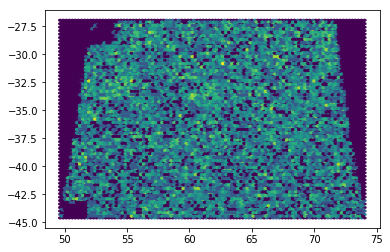

In [6]:
plt.hexbin(truthdata['ra'][i0], truthdata['dec'][i0], bins='log')

Text(0.5, 1.0, 'Cluster Centrals, 1 deg2')

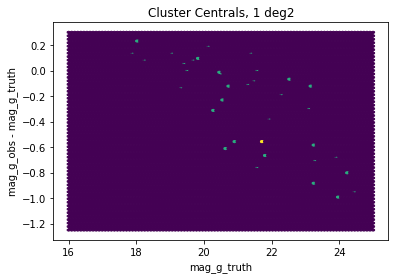

In [10]:
use, = np.where((truthdata['ra'][i0] > 60.0) & (truthdata['ra'][i0] < 61.0) &
                (truthdata['dec'][i0] > -35.0) & (truthdata['dec'][i0] < -34.0))
plt.hexbin(truthdata['mag_true_g_lsst'][i0[use]], mag_g_matched[use] - truthdata['mag_true_g_lsst'][i0[use]], 
           bins='log', 
           extent=[16, 25, -1.25, 0.3])
plt.xlabel('mag_g_truth')
plt.ylabel('mag_g_obs - mag_g_truth')
plt.title('Cluster Centrals, 1 deg2')

Text(0.5, 1.0, 'Cluster centrals, 1 deg2')

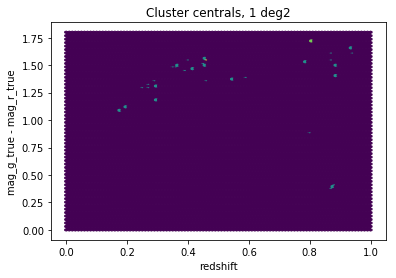

In [11]:
plt.hexbin(truthdata['redshift'][i0[use]], 
           truthdata['mag_true_g_lsst'][i0[use]] - truthdata['mag_true_r_lsst'][i0[use]],
           bins='log', extent=[0.0, 1.0, 0.0, 1.8])
plt.xlabel('redshift')
plt.ylabel('mag_g_true - mag_r_true')
plt.title('Cluster centrals, 1 deg2')

Text(0.5, 1.0, 'Cluster Centrals, 4 deg2')

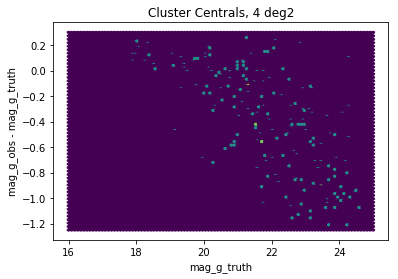

In [12]:
use, = np.where((truthdata['ra'][i0] > 60.0) & (truthdata['ra'][i0] < 62.0) &
                (truthdata['dec'][i0] > -35.0) & (truthdata['dec'][i0] < -33.0))
plt.hexbin(truthdata['mag_true_g_lsst'][i0[use]], mag_g_matched[use] - truthdata['mag_true_g_lsst'][i0[use]], 
           bins='log', 
           extent=[16, 25, -1.25, 0.3])
plt.xlabel('mag_g_truth')
plt.ylabel('mag_g_obs - mag_g_truth')
plt.title('Cluster Centrals, 4 deg2')

Text(0.5, 1.0, 'Cluster centrals, 4 deg2')

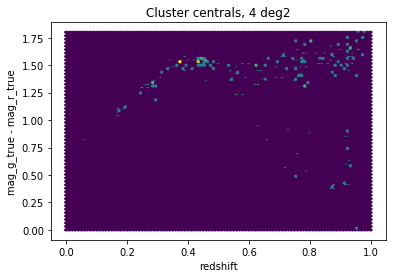

In [13]:
plt.hexbin(truthdata['redshift'][i0[use]], 
           truthdata['mag_true_g_lsst'][i0[use]] - truthdata['mag_true_r_lsst'][i0[use]],
           bins='log', extent=[0.0, 1.0, 0.0, 1.8])
plt.xlabel('redshift')
plt.ylabel('mag_g_true - mag_r_true')
plt.title('Cluster centrals, 4 deg2')

Text(0.5, 1.0, 'Cluster Centrals, 9 deg2')

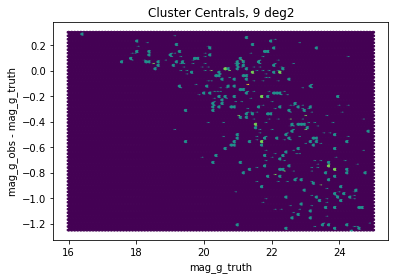

In [14]:
use, = np.where((truthdata['ra'][i0] > 60.0) & (truthdata['ra'][i0] < 63.0) &
                (truthdata['dec'][i0] > -35.0) & (truthdata['dec'][i0] < -32.0))
plt.hexbin(truthdata['mag_true_g_lsst'][i0[use]], mag_g_matched[use] - truthdata['mag_true_g_lsst'][i0[use]], 
           bins='log', 
           extent=[16, 25, -1.25, 0.3])
plt.xlabel('mag_g_truth')
plt.ylabel('mag_g_obs - mag_g_truth')
plt.title('Cluster Centrals, 9 deg2')

Text(0.5, 1.0, 'Cluster centrals, 9 deg2')

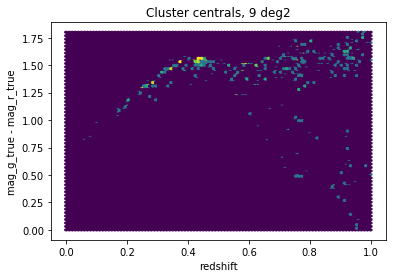

In [15]:
plt.hexbin(truthdata['redshift'][i0[use]], 
           truthdata['mag_true_g_lsst'][i0[use]] - truthdata['mag_true_r_lsst'][i0[use]],
           bins='log', extent=[0.0, 1.0, 0.0, 1.8])
plt.xlabel('redshift')
plt.ylabel('mag_g_true - mag_r_true')
plt.title('Cluster centrals, 9 deg2')

Text(0.5, 1.0, 'Cluster Centrals, 25 deg2')

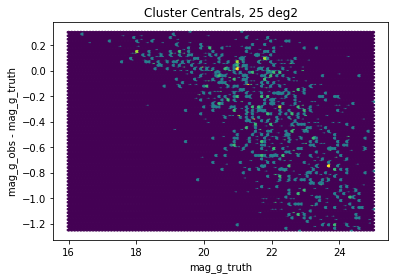

In [16]:
use, = np.where((truthdata['ra'][i0] > 60.0) & (truthdata['ra'][i0] < 65.0) &
                (truthdata['dec'][i0] > -35.0) & (truthdata['dec'][i0] < -30.0))
plt.hexbin(truthdata['mag_true_g_lsst'][i0[use]], mag_g_matched[use] - truthdata['mag_true_g_lsst'][i0[use]], 
           bins='log', 
           extent=[16, 25, -1.25, 0.3])
plt.xlabel('mag_g_truth')
plt.ylabel('mag_g_obs - mag_g_truth')
plt.title('Cluster Centrals, 25 deg2')

Text(0.5, 1.0, 'Cluster centrals, 25 deg2')

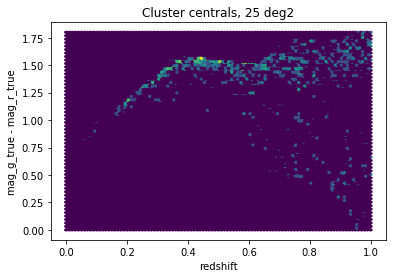

In [17]:
plt.hexbin(truthdata['redshift'][i0[use]], 
           truthdata['mag_true_g_lsst'][i0[use]] - truthdata['mag_true_r_lsst'][i0[use]],
           bins='log', extent=[0.0, 1.0, 0.0, 1.8])
plt.xlabel('redshift')
plt.ylabel('mag_g_true - mag_r_true')
plt.title('Cluster centrals, 25 deg2')

Text(0.5, 1.0, 'Cluster Centrals, 25 deg2')

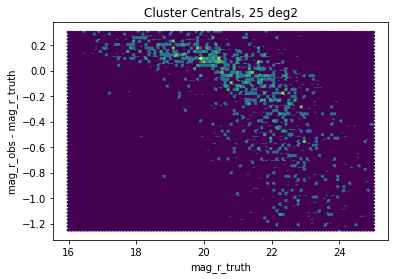

In [18]:
plt.hexbin(truthdata['mag_true_r_lsst'][i0[use]], mag_r_matched[use] - truthdata['mag_true_r_lsst'][i0[use]], 
           bins='log', 
           extent=[16, 25, -1.25, 0.3])
plt.xlabel('mag_r_truth')
plt.ylabel('mag_r_obs - mag_r_truth')
plt.title('Cluster Centrals, 25 deg2')

Text(0.5, 1.0, 'Cluster Centrals, 25 deg2')

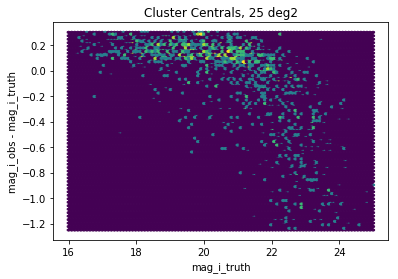

In [19]:
plt.hexbin(truthdata['mag_true_i_lsst'][i0[use]], mag_i_matched[use] - truthdata['mag_true_i_lsst'][i0[use]], 
           bins='log', 
           extent=[16, 25, -1.25, 0.3])
plt.xlabel('mag_i_truth')
plt.ylabel('mag_i_obs - mag_i_truth')
plt.title('Cluster Centrals, 25 deg2')